# Assignment 3

## Objective of this assignment
The objective of this exercise is to become familiar with fitting decision trees and
making ROC curves in Python.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **(and nothing else)** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, Introduction to Data Mining, section 4.1-4.6, as well as the included article on ROC curves.


## 3.1 Decision trees

In this part of the exercise we will fit decision trees using the scikitlearn classifier
`sklearn.tree.DecisionTreeClassifier`. As a splitting criterion, the function uses
one of the following two impurity measures:

\begin{equation} \textrm{gdi}(t) = -\sum_{i=1}^C p(i|t)^2 \quad \text{       equivalent to Gini(t)} \end{equation}   

\begin{equation}
\textrm{deviance}(t) = -2\sum_{i=1}^C p(i|t) \log p(i|t) \quad \text{equivalent to Entropy(t)} 
\end{equation}

We will analyze the wine data we have used previously. The wine data set has the following attributes, all of which are continuous: 


| #             | Attribute     | Unit  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | g/dm$^3$ |
|2 | Volatile acidity (acetic) | g/dm$^3$ |
|3 | Citric acid | g/dm$^3$ |
|4 | Residual sugar | g/dm$^3$ |
|5 | Chlorides | g/dm$^3$ |
|6 | Free sulfur dioxide | mg/dm$^3$ |
|7 | Total sulfur dioxide | mg/dm$^3$ |
|8 | Density | g/cm$^3$ |
|9 | pH | pH |
|10 | Sulphates | g/dm$^3$ |
|11 | Alcohol | % vol. | 


#### 3.1.1
(0.5 pts) Load the wine data set `Data/wine.mat` using the `scipy.io` `loadmat` function. This contains the same data as used in the earlier assignment, but with outliers and the 12th attribute already removed. Create data matrix $X$, class vector $y$, and the lists $attributeNames$ and $classNames$ with the data provided in the `wine.mat` file. Print out the  $attributeNames$ and $classNames$ to make sure it's a list of strings.

   ** hints: **   
*The object in wine.mat is a dictionary. The attributes are stored in matrix $X$, the class in vector $y$. $y$ is shaped as an array containing single element arrays. To flatten $y$, you can use `y.ravel()`, which unravels matrices into a 1d array. Attribute names and class names are stored in the attributeNames and classNames objects, which contain arrays, of which the first element contains the names. To get the names from those arrays, you can use list comprehension or for-loops. For more on list comprehension, check https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3. For example, if you have an larger array containing nested arrays of which you want the first element, you can try `new_array = [nested_array[0] for nested_array in larger_array]`.*



In [1]:
import scipy.io as sio
import os
Wine = "../Data/wine.mat"
os.chdir("./Toolbox/")
data = sio.loadmat(Wine)
X = data['X'].tolist()
y = data['y'].ravel()


#get class names and attribute names
header = data['attributeNames'].tolist()
classheader = data['classNames'].tolist()
attributeNames= []
classNames = []
for i in range(len(header[0])):
    attribute = header[0][i][0]
    attributeNames.append(attribute)  
for i in range(len(classheader)):
    typeclass = classheader[i][0][0]
    classNames.append(typeclass)


print(classNames)
print(attributeNames)


['Red', 'White']
['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual sugar', 'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']


#### 3.1.2
 (1.5 pts) Fit a decision tree to the wine data in order to estimate if the wine is red or white. Use the Gini (gdi) splitting criterion. Use `min_samples_split=100` for the stopping criterion. Explain what happens when you change the values of the parameter `min_samples_split`. After fitting the tree, visualize it with the tree_print function in `treeprint.py` in the Toolbox folder. 

** hints: **   
*The `treeprint.py` file contains some documentation on how to use it. Helpfull documentation for the DecisionTreeClassifier function can be found at * http://scikit-learn.org/stable/modules/tree.html#classification  



In [2]:
import sklearn
from sklearn.datasets import load_wine
import numpy as np
from  sklearn.model_selection import train_test_split
from  sklearn.model_selection import ShuffleSplit
from sklearn import tree
import treeprint

classifier = tree.DecisionTreeClassifier(min_samples_split=100)
classifier = classifier.fit(X,y)

treeprint.tree_print(classifier, attributeNames, classNames)

prediction = classifier.predict(X)


accuracy = sklearn.metrics.accuracy_score(prediction,y)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")



         |->3  White
         |
      |->2 then if Sulphates =< 0.56: go to 3, else go to 4
      |  |
      |  |->4  White
      |
   |->1 then if Chlorides =< 0.05: go to 2, else go to 5
   |  |
   |  |  |->6  White
   |  |  |
   |  |->5 else if Sulphates =< 0.37: go to 6, else go to 7
   |     |
   |     |  |->8  White
   |     |  |
   |     |->7 else if Density =< 0.99: go to 8, else go to 9
   |        |
   |        |     |->11  White
   |        |     |
   |        |  |->10 then if Residual sugar =< 1.10: go to 11, else go to 12
   |        |  |  |
   |        |  |  |  |->13  Red
   |        |  |  |  |
   |        |  |  |->12 else if Density =< 0.99: go to 13, else go to 14
   |        |  |     |
   |        |  |     |  |->15  Red
   |        |  |     |  |
   |        |  |     |->14 else if Chlorides =< 0.05: go to 15, else go to 16
   |        |  |        |
   |        |  |        |  |->17  Red
   |        |  |        |  |
   |        |  |        |->16 else if Sulphates =< 0.45:

----
the parameter min_samples_split= 100 influences how many records you minimal should have after splitting nodes. So if you are splitting a node at minimum it should have 2 records which after splitting into two nodes will give 1 record each which is specified by the min_samples_leaf. So,a split will not happen if there are less than a certain number of records specified by min_samples_split in a node, in this case one hundred.

----

#### 3.1.3

(0.5 pts) Show that a wine with the following attribute values would be classified as white by the tree fitted in 3.1.2, by applying the `predict()` function from the DecisionTreeClassifier to this sample.  Have another look at the visualized tree. Which attributes are used to classify this wine? 

| #             | Attribute     | Value  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | 6.9 g/dm$^3$ |
|2 | Volatile acidity (acetic) | 1.09 g/dm$^3$ |
|3 | Citric acid | 0.06 g/dm$^3$ |
|4 | Residual sugar | 2.1 g/dm$^3$ |
|5 | Chlorides | 0.0061 g/dm$^3$ |
|6 | Free sulfur dioxide | 12 mg/dm$^3$ |
|7 | Total sulfur dioxide | 31 mg/dm$^3$ |
|8 | Density | 0.99 g/cm$^3$ |
|9 | pH | 3.5 |
|10 | Sulphates | 0.64 g/dm$^3$ |
|11 | Alcohol | 12 % vol. | 

** hints: **
*If you don't know how to classify input values with a tree, see the help documentation for the DecisionTreeClassifier function on how to predict the label for a sample. *

In [3]:

predictionWine = [[6.9, 1.09 ,0.06, 2.1, 0.0061, 12, 31, 0.99, 3.5, 0.64, 12],[0]]
print(predictionWine)

prediction = classifier.predict(X[1:2])
prediction2 = classifier.predict(predictionWine[0:1])

print(prediction2)


[[6.9, 1.09, 0.06, 2.1, 0.0061, 12, 31, 0.99, 3.5, 0.64, 12], [0]]
[1]


----
The attributes used to classify this wine are:
first it looks at if Chlorides =< 0.05, this is not the case so
the tree looks if Sulphates =< 0.37:, this is not the case so
the tree looks if Density =< 0.99: this is the case! so 
all steps combined lead to the classifier thinking the wine is white! so in this case it is correct


----

#### 3.1.4
(1 pts) Classify all the wines in the wine data set. What percentage of the wine data is classified correctly by the tree?



In [4]:
prediction = classifier.predict(X)


accuracy = sklearn.metrics.accuracy_score(prediction,y)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")

Accuracy:  98.68 %


----
the percentage of wine classified correctly by the tree is 98,68%


## 3.2 Decision tree pruning using cross-validation

In this exercise we will use cross-validation to prune a decision tree. When applying cross-validation the observed data is split into training and test sets, i.e., `X_train`, `y_train` and `X_test` and `y_test`. We train the model on the training data and evaluate the performance of the trained model on the test data.

#### 3.2.1
(2 pts) We are again using the wine data set `Data/wine.mat`. Divide the data into a training and a test data set (see hints!). Fit a decision tree to the training data using the Gini (`gdi`) splitting criterion.

Now, we want to find an optimally pruned decision tree by *modifying its maximum depth*. For different values of the parameter `depth` (from 2 to 20), 
+ first fit the decision tree
+ then compute the classification error on the training and test set (this is called holdout cross-validation)

When you've done this for `depth` values 2,...,20, plot the training and test classification error as a function of the tree depth in the same figure. This will show us what the optimal pruning depth is for the training set, but also how well this generalizes to a test set. 


** hints: **  
*Take a look at the module `sklearn.model_selection` and see how it can be used to partition the data into a training and a test set (holdout validation, `train_test_split()` function). Note that the package also contains functions to partition data for K-fold cross-validation. Some of the functions can ensure that both training and test sets have roughly the same class proportions. The error is 1-accuracy. The easiest way to compute the accuracy is by using the sklearn metrics module: 
 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data?


depth: 2
Accuracy:  80.90 %


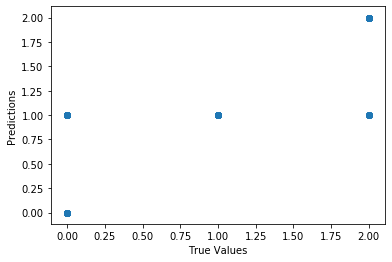

crossvalidation scores: [0.95       0.83333333 0.94117647 0.88235294 0.94117647]


depth: 3
Accuracy:  84.27 %


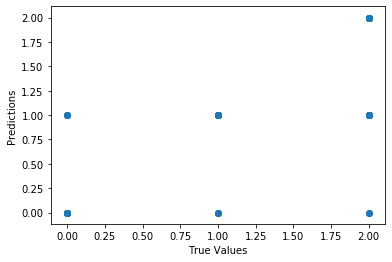

crossvalidation scores: [1.         0.88888889 0.94117647 0.88235294 0.82352941]


depth: 4
Accuracy:  93.26 %


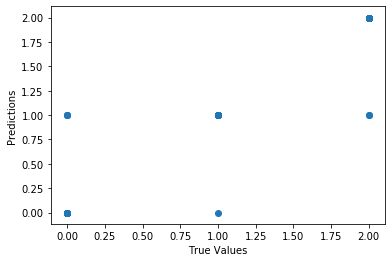

crossvalidation scores: [1.         0.83333333 0.88235294 0.88235294 0.88235294]


depth: 5
Accuracy:  89.89 %


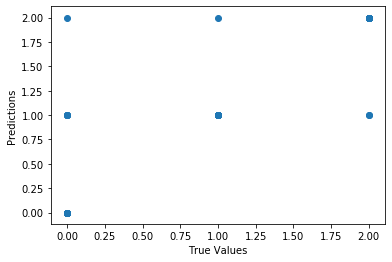

crossvalidation scores: [0.95       0.83333333 0.94117647 0.88235294 0.88235294]


depth: 6
Accuracy:  91.01 %


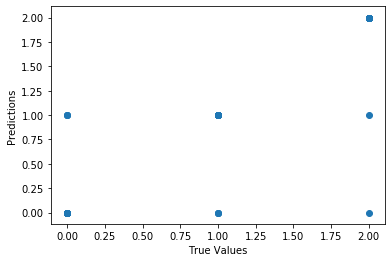

crossvalidation scores: [1.         0.88888889 0.88235294 0.88235294 0.82352941]


depth: 7
Accuracy:  87.64 %


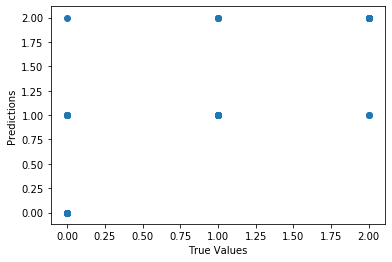

crossvalidation scores: [1.         0.83333333 0.94117647 0.88235294 0.76470588]


depth: 8
Accuracy:  93.26 %


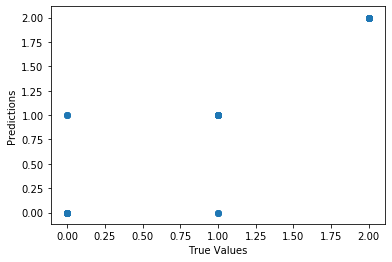

crossvalidation scores: [1.         0.88888889 0.94117647 0.88235294 0.76470588]


depth: 9
Accuracy:  91.01 %


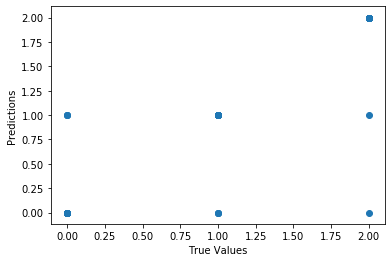

crossvalidation scores: [1.         0.83333333 0.94117647 0.88235294 0.88235294]


depth: 10
Accuracy:  93.26 %


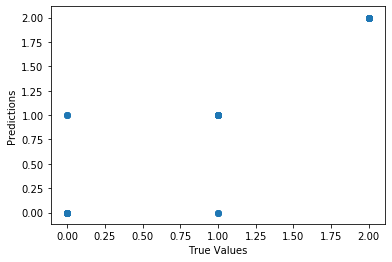

crossvalidation scores: [0.95       0.88888889 0.82352941 0.88235294 0.82352941]


depth: 11
Accuracy:  89.89 %


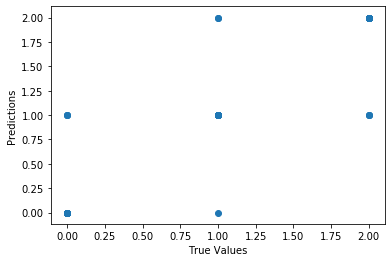

crossvalidation scores: [1.         0.83333333 0.94117647 0.88235294 0.88235294]


depth: 12
Accuracy:  89.89 %


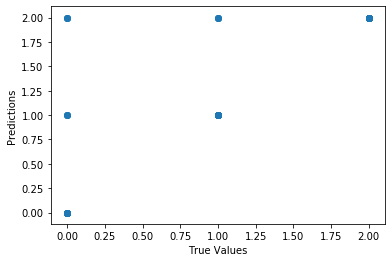

crossvalidation scores: [0.95       0.83333333 0.94117647 0.88235294 0.82352941]


depth: 13
Accuracy:  91.01 %


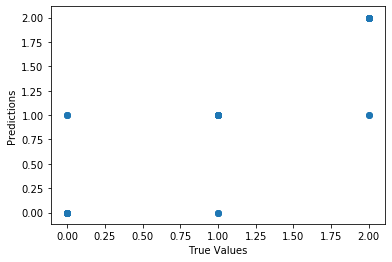

crossvalidation scores: [0.95       0.83333333 0.94117647 0.88235294 0.82352941]


depth: 14
Accuracy:  92.13 %


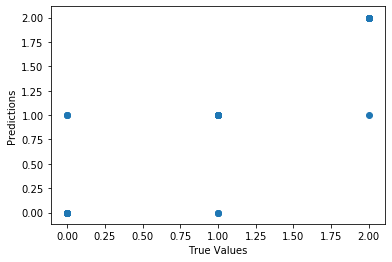

crossvalidation scores: [1.         0.83333333 0.94117647 0.88235294 0.88235294]


depth: 15
Accuracy:  87.64 %


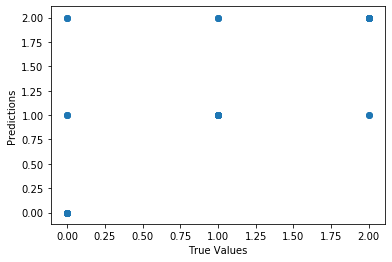

crossvalidation scores: [0.95       0.88888889 0.94117647 0.88235294 0.76470588]


depth: 16
Accuracy:  93.26 %


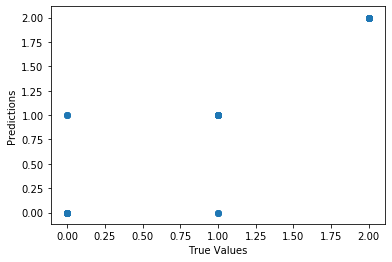

crossvalidation scores: [1.         0.83333333 0.94117647 0.88235294 0.76470588]


depth: 17
Accuracy:  93.26 %


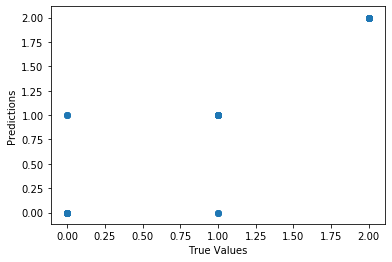

crossvalidation scores: [1.         0.88888889 0.94117647 0.88235294 0.82352941]


depth: 18
Accuracy:  91.01 %


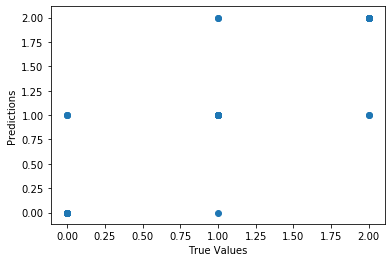

crossvalidation scores: [0.95       0.83333333 0.82352941 0.88235294 0.76470588]


depth: 19
Accuracy:  91.01 %


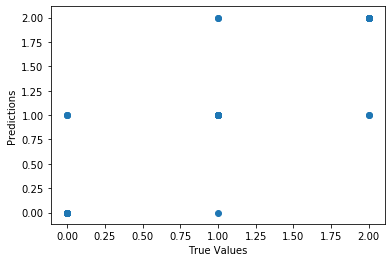

crossvalidation scores: [1.         0.88888889 0.94117647 0.88235294 0.88235294]


depth: 20
Accuracy:  93.26 %


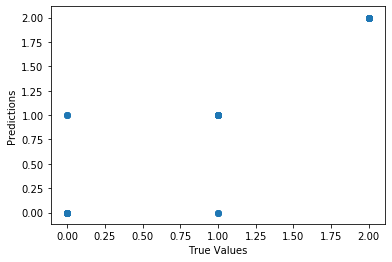

crossvalidation scores: [0.95       0.83333333 0.82352941 0.88235294 0.76470588]




In [16]:
import sklearn
from sklearn.datasets import load_wine
import numpy as np
from  sklearn.model_selection import train_test_split
from  sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm
from matplotlib import pyplot as plt
from sklearn import tree

dataset = load_wine()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.50, random_state = 45)

for i in range(2,21):
    print("depth: "+str(i))
    classifier = tree.DecisionTreeClassifier(max_depth=i)
    classifier = classifier.fit(X_train,y_train)

    prediction = classifier.predict(X_test)

    accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
    print("Accuracy: ", '%.2f'% (accuracy*100),"%")
    plt.scatter(y_test, prediction)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.show()

    #compute the classification error 
    clf = svm.SVC(kernel='linear', C=1)
    scores = cross_val_score(classifier, X_test, y_test, cv=5)
    print("crossvalidation scores: " + str(scores))
    print('\n')


----
the optimal depth in the tree with a training set of 50% is a depth of 15 with a accuracy of 93,26%
when the tree is runned again a new optimal depth is appointed to a different tree (so the answer given above does not hold for all trees created).

----

#### 3.2.2
(1.5 pts) Repeat the exercise above, using 10-fold cross-validation. K-fold cross-validation works by splitting X into K partitions of equal length. Then in each fold, you choose K-1 partitions as the training set and the remaining partition as the test set. Every partition gets a turn being a test set. For a very nice simple explanation of how (and why) K-fold works, check out http://www.dummies.com/programming/big-data/data-science/resorting-cross-validation-machine-learning/


For each fold, fit a decision tree on the training set and evaluate its performance on the test set. Finally, compute the average classification errors on the test- and training sets across the 10 cross-validation folds and plot them as a function of the tree depth.

** hints: **
*This time the `KFold()` function from the module `sklearn.model_selection` can be used to partition the data into the 10 training and test partitions. Check out http://scikit-learn.org/stable/modules/cross_validation.html#k-fold for an example of how to acces the indices for the training set and the test set in each fold. Those indices can then be used to create the training and test set, e.g. `X_train = X[train_indices]`*

*If you are creating a for loop iterating over an object where you both need the index and the elements of the object, you can enumerate the object. For example:*

`
for index, (element) in enumerate(object):
    array[index] = operation(element)
`
 

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data? How about 100-fold cross-validation?


TRAIN: [ 18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Accuracy:  100.00 %


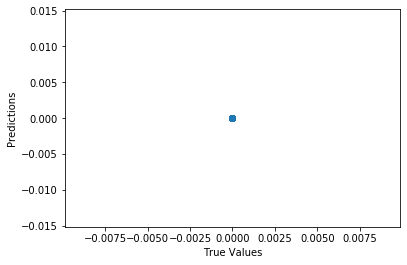

crossvalidation scores: [1. 1. 1. 1. 1.]


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] TEST: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Accuracy:  83.33 %


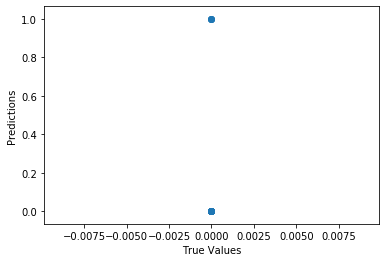

crossvalidation scores: [1. 1. 1. 1. 1.]


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] TEST: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53]
Accuracy:  88.89 %


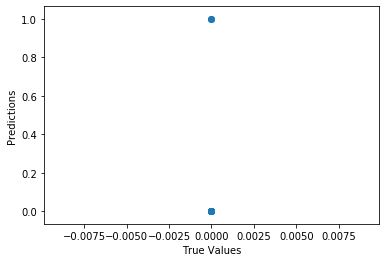

crossvalidation scores: [1. 1. 1. 1. 1.]


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] TEST: [54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Accuracy:  66.67 %


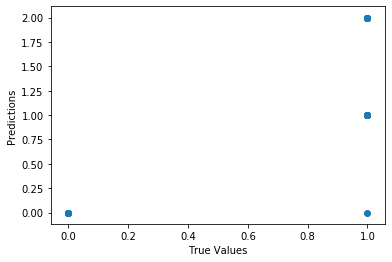

crossvalidation scores: [1. 1. 1. 1. 1.]


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] TEST: [72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Accuracy:  77.78 %


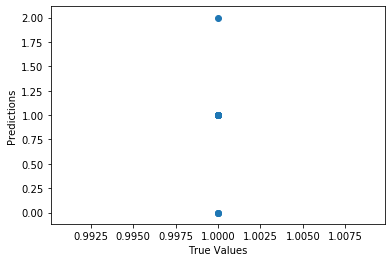

crossvalidation scores: [1. 1. 1. 1. 1.]


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] TEST: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
Accuracy:  100.00 %


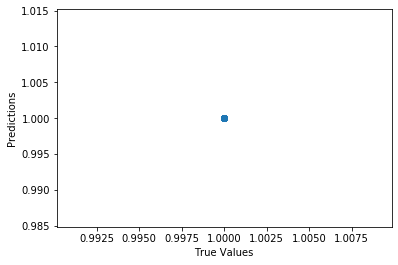

crossvalidation scores: [1. 1. 1. 1. 1.]


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] TEST: [108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
Accuracy:  88.89 %


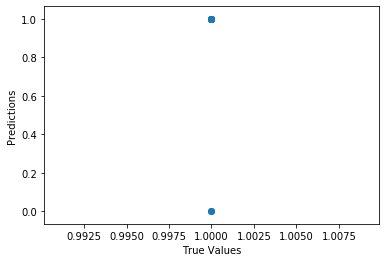

crossvalidation scores: [1. 1. 1. 1. 1.]


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] TEST: [126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
Accuracy:  72.22 %


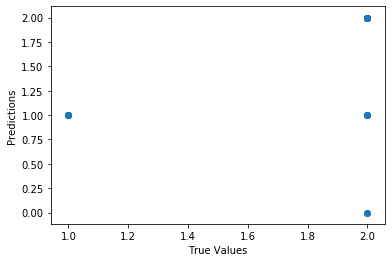

crossvalidation scores: [1.   0.75 0.75 1.   1.  ]


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] TEST: [144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160]
Accuracy:  88.24 %


/home/ernst/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


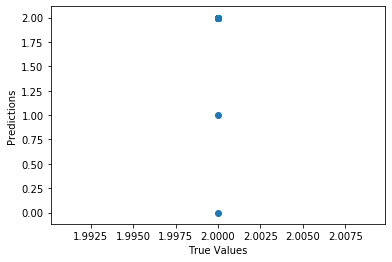

crossvalidation scores: [1. 1. 1. 1. 1.]


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160] TEST: [161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
Accuracy:  94.12 %


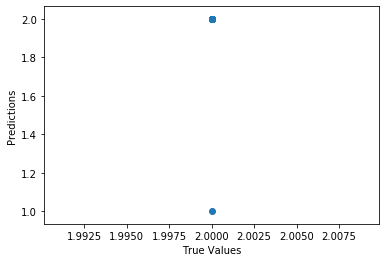

crossvalidation scores: [1. 1. 1. 1. 1.]




In [18]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.datasets import load_wine
import numpy as np
from  sklearn.model_selection import train_test_split
from  sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm
from matplotlib import pyplot as plt
from sklearn import tree

dataset = load_wine()
columns = attributeNames

from sklearn.model_selection import KFold # import KFold
X = dataset.data # create an array
y = dataset.target # Create another array
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validatorprint(kf) 

for train_index, test_index in kf.split(X):
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
#X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.10, random_state = 45)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier = tree.DecisionTreeClassifier(max_depth=10)
    classifier = classifier.fit(X_train,y_train)

    prediction = classifier.predict(X_test)

    accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
    print("Accuracy: ", '%.2f'% (accuracy*100),"%")
    plt.scatter(y_test, prediction)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.show()

    #compute the classification error 
    clf = svm.SVC(kernel='linear', C=1)
    scores = cross_val_score(classifier, X_test, y_test, cv=5)
    print("crossvalidation scores: " + str(scores))
    print('\n')



----
write your answer here
the optimal tree depth seems to be in the first kfold (100% accuracy). when the code is runned again there seem not te be too much difference between the results. with a 100-fold cross-validation the results seem to be much more accurate.

 ## 3.3 ROC curves, AUC scores, and the sign test

In this exercise we will use ROC curves and the sign test to compare classifiers. Study the lecture slides and the paper 'ROC Graphs: Notes and Practical Considerations for Researchers' by Tom Fawcett included with the homework assignment (ROC101.pdf). It describes all you need to know (and much, much more..) about ROC curves. The method explained for computing the area under the curve is unnecessarily complicated. A simpler formula is:
$$
    \mbox{AUC} = {1 \over m n} \sum_{i=1}^m \sum_{j=1}^n \mathbf{\large 1}_{p_i > p_j} \: .
   $$
Here $i$ runs over all $m$ data points with true label 1, and $j$ runs over all $n$ data points with true label $0$; $p_i$ and $p_j$ denote the probability score assigned by the classifier to data point $i$ and $j$, respectively. $\mathbf{\large 1}$ is the indicator function: it outputs $1$ if the condition (here $p_i > p_j$) is satisfied and $0$ otherwise. *Simply put: this formula computes how often the probability of a data point with true label 1 is higher than the probability of data points with true label 0. This is then divided by the total number of comparisons between probabilities.*
    

#### 3.3.1
(0.25 pts) To make sure you understand how ROC works, make an ROC curve and calculate the AUC (on paper) with the following data:

`
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
`
    
What's the AUC you calculated? Do you think this classifier works well?


----
write your answer here
AUC = 0.84 and this is a good classifier
----

#### 3.3.2
  Load the file `Data/classprobs.xls` using the Pandas `read_excel` function. Inspect the data and cast it to an array with the `.values` attribute. The first column gives the true class label (either 0 or 1). The second and third column give the probabilistic scores for two different classifiers. The higher this probability, the more certain the classifier is that the example belongs to class 1 (instead of class 0).


In [6]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('/home/ernst/Documents/School/Pre-master_DataScience/Data_Mining/Assignment_3/Data/classprobs.xls', sheetname='Sheet1')
valueArray = df.values
print(valueArray)



[[0.       0.13591  0.099401]
 [0.       0.55549  0.65075 ]
 [0.       0.23876  0.50857 ]
 [0.       0.14542  0.23629 ]
 [1.       0.81876  0.48949 ]
 [0.       0.50594  0.038203]
 [1.       0.93954  0.23982 ]
 [1.       0.22339  0.62287 ]
 [0.       0.31219  0.57823 ]
 [0.       0.19486  0.61664 ]
 [1.       0.61471  0.5013  ]
 [1.       0.63854  0.75183 ]
 [0.       0.29924  0.33768 ]
 [0.       0.16546  0.44035 ]
 [1.       0.72124  0.44813 ]
 [0.       0.1088   0.37254 ]
 [1.       0.48676  0.25349 ]
 [1.       0.94156  0.64531 ]
 [0.       0.2968   0.53258 ]
 [0.       0.24267  0.26251 ]
 [0.       0.17043  0.44888 ]
 [0.       0.015464 0.5467  ]
 [1.       0.30852  0.32406 ]
 [0.       0.11212  0.28476 ]
 [0.       0.29639  0.41658 ]
 [1.       0.97275  0.79959 ]
 [1.       0.58501  0.30657 ]
 [0.       0.12244  0.43778 ]
 [1.       0.87557  0.75815 ]
 [1.       0.76142  0.32031 ]
 [0.       0.14132  0.22986 ]
 [1.       0.86004  0.35583 ]
 [0.       0.13915  0.39455 ]
 [0.      

/home/ernst/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


#### 3.3.3
(1 pts) Calculate the ROC curves for both of the classifiers by calculating the FP and TP rates and plot them in the same plot. Make the plot yourself as opposed to using a library! Also plot a dashed line on the diagonal to represent random guessing in the same figure. Interpret the obtained results. Do both classifiers perform better than random guessing?

** hints: **  
*The function `sklearn.metrics.roc_curve` can be used for computing the FP and TP rates. You can then plot them using the `matplotlib.pyplot` `plot` function. Check the documentation on how to plot a dashed line. Remember to include a legend!* 

**An extra tip: the sign test example below includes a figure with dashed lines and a legend...**
 

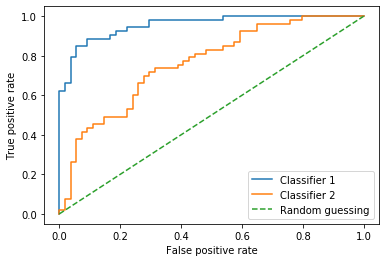

In [10]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics

Score = []
Clas1 = []
Clas2 = []
for i in range(len(valueArray)):
    Score.append(valueArray[i][0])
    Clas1.append(valueArray[i][1])
    Clas2.append(valueArray[i][2])
fpr1, tpr1, thresholds1 = sklearn.metrics.roc_curve(Score,Clas1)
fpr2, tpr2, thresholds2 = sklearn.metrics.roc_curve(Score,Clas2)

plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.plot([0,1], '--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['Classifier 1', 'Classifier 2', 'Random guessing'], loc='lower right')
plt.show()


----
write your answer here

Both classifiers perform better than random guessing.
Classifier 1 is the best.

----

#### 3.3.4
(0.5 pts) Compute the AUC scores (area under the curve) of both classifiers using the formula given above. **Write your own code for this calculation.** Do the AUC scores indicate that the classifiers are performing better than this baseline?




 

In [11]:
import numpy as np


def calc_AUC(labels,scores):
    positive= []
    negative= []
    for item in range(len(labels)):
        if labels[item] == 1:
            positive.append(scores[item])
        if labels[item] == 0:
            negative.append(scores[item]) 

    n_pos = len(positive)
    n_neg = len(negative)

    AUC= 0
    for p in range(len(positive)):
        m= positive[p]
        for n in range(len(negative)):
            n=negative[n]
            output = 0
            if  m > n:
                output = 1
            AUC += (1/(n_pos*n_neg))*output
    return AUC

print("Classifier 1: "+ str(calc_AUC(Score,Clas1)))
print("Classifier 2: "+ str(calc_AUC(Score,Clas2)))
# Check answers
auc1 = sklearn.metrics.auc(fpr1,tpr1)
auc2 = sklearn.metrics.auc(fpr2,tpr2)
print(round(calc_AUC(Score,Clas1),2)==round(auc1,2))
print(round(calc_AUC(Score,Clas2),2)==round(auc2,2))

Classifier 1: 0.95562543675756
Classifier 2: 0.7613556953179935
True
True


----
write your answer here

"*this baseline?*" , what baseline? Random guessing?


Random guessing has a auc of 0.5. An AUC closer to 1 is better so it's vissible that clasifier 2 is good but clasifier 1 is better.

----


#### 3.3.5
(0.25 pts) Using a threshold of 0.5, translate the probability scores to predicted class labels, and compute the accuracy for each of the classifiers.

** hint: **

*Take a look at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

In [12]:
def calc_Acc(labels,scores):
    for item in range(len(scores)):
        scores[item] = round(scores[item],0)
    print(sklearn.metrics.accuracy_score(labels,scores))
    
calc_Acc(Score,Clas1)
calc_Acc(Score,Clas2)

0.8598130841121495
0.6915887850467289


#### 3.3.6
(1 pts) Create the 2x2 table (or array, or list, or dataframe..) of wrong and correct classifications by the first and the second classifier, like in the lecture slides (lecture on model evaluation, part on the sign test). Perform a sign test to test whether the performance of the two classifiers is significantly different at a significance level of 0.05. **If you are not familiar with sign testing, you can read the example provided below.**


** hints: **  
*As explained in the lecture slides, the sign test is a binomial test on the lower-left ($N_{1<2}$) and upper-right ($N_{1>2}$) elements of the cross table. Unlike in the lecture slides, here you need to perform a two-sided test: $$\textrm{p-value} = P(W \leq \min(N_{1<2},N_{1>2}) \textrm{ or } W \geq  \max(N_{1<2},N_{1>2})$$
The function `scipy.stats.binom.cdf` can be used to compute the cumulative density of the binomial distribution.
For more information on the sign test, see the included paper by Salzberg (signtest.pdf, in particular section 3.1).*

In [13]:
from scipy.stats import binom
def signtest(labels,Clas1,Clas2):
    Correct = 0
    Wrong = 0
    One = 0
    Two = 0
    for item in range(len(labels)):
        if labels[item] == round(Clas1[item],0) and labels[item] == round(Clas2[item],0):
            Correct += 1
        elif labels[item]!= round(Clas1[item],0) and labels[item] != round(Clas2[item],0):
            Wrong += 1
        elif labels[item]== round(Clas1[item],0) and labels[item] != round(Clas2[item],0):
            One += 1
        elif labels[item]!= round(Clas1[item],0) and labels[item] == round(Clas2[item],0):
            Two += 1
    
    b = binom(One+Two,0.5) 
    p_value = b.cdf(min(One,Two)) + (1-b.cdf(max(One,Two)-1))
    return p_value
print("The p-value is " + str(signtest(Score,Clas1,Clas2)))
      
      
      
    
    

The p-value is 0.0029350556433200854


----
write your answer here

Meaning it is significant!

Since p_value is lower than 0.05!

----

## Example two-sided sign test

Imagine you have a lucky coin, that you are certain does not result in heads 50% of the times you flip it. However, you friend (lets call him *zero_hypothesis*) claims that your coin is just like his random coin. To verify whether this is true, you decide to compare the performance (you are a scientist after all) of your lucky coin resulting in heads to the performance of his random coin resulting in heads with a sign test. How do you do this?

First, you collect data. Assume you place 23 bets. During those 23 bets, you both flip your respective coins. It was determined that if one of you flipped head while the other didn't, that person won the bet, and the other person lost. If you both got the same outcome, neither of you won. 1 stands for head, and 0 for tails. These were your results:

In [ ]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

#results
lucky_coin = np.array([1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1])
random_coin= np.array([0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0])

print('----------lucky | random \n',*['bet {:<5}  | {} | {}\n'.format(t[0],t[1],t[2]) for t in zip(range(0,len(lucky_coin)),lucky_coin,random_coin)],'-----\n')

Now you calculate how often in any pair of outcomes one coin *won*, i.e. one coin flipped to head while the other flipped to tails.

In [ ]:
N_l = sum((lucky_coin == 1) & (random_coin == 0)) #how often your lucky coin won
N_r = sum((lucky_coin == 0) & (random_coin == 1)) #how often the random coin won
N = N_l + N_r #how often one coin was a winner
print('The lucky coin won {} times, while the random won {} times.'.format(N_l,N_r))

You observed 15 times that one coin won. If both coins resulted in heads 50% of the time, like *zero_hypothesis* stated, you'd expect that both coins have 50% chance of being the winner. So the probability distributions for both N_l and N_r should look something like this, assuming that *zero_hypothesis* is right:

In [ ]:
b = binom(N,0.5) #N=observations of inequality, p=prob of one coin being better, which is 0.5 according to your H0
plt.plot(b.pmf(range(N+1)), '--o',label = 'Probability density')
plt.plot(b.cdf(range(N+1)), '--o',label = 'Cumulative distribution')
plt.legend()
plt.xlabel('Number of times one coin is better than the other')
plt.ylabel('Probability')
plt.title('Distribution according to H0')
plt.show()

(Of course this is a discrete probability function, so you're not interested in values between integers.)

As you can see, according to *zero_hypothesis*, 7 and 8 are the most likely values for both N_l and N_r. But this is not what you observed in your data. To conclude that *H0* is false, you need to show that your outcome is unlikely under the assumption that *H0* is true: the values you observed are so extreme that these values or more extreme values occur less than 5% of the time (*p-value < 0.05*). So how unlikely is it that one coin is better 12 times or more, and the other is better 3 times or less?

It's the sum of the values of the probability density function (pdf or pmf in the python doc) at  0,1,2 and 3, plus the sum of the values of the pdf at 12,13,14 and 15. 

This is equal to the value of the cumulative distribution function (cdf) at 3, plus 1 minus the value of cdf at 11 (since `1-cdf(11)` represents the probability of observing 12 or bigger).

In [ ]:
p_value = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))
print('The p-value is {:.3f}'.format(p_value))

So your observations are very unlikely if *zero_hypothesis* is right. By statistical theory, you can now say that you have significant reason to reject their opinion. Now the hardest part of statistics: convincing your non-scientist friends.